In [2]:
import sqlite3
import csv

In [3]:
import re
# Getting data from csv file
lines_with_value = []
# is list of pair( list[ words in line/article] , list[its annotated value])
#function for text processing
def text_preprocessing(
    token:str,
    punctuations = r'''!()-[]{};:‘'’"\,<>./?@#$%^&*_“~''')->list:
    # print(token)
    if token in punctuations:
        return str("")
    for x in token:
        # print(x)
        if x in punctuations:
            x.replace(x,'')
    # print(token)
    # Removing words that have numbers in them
    token = re.sub(r'\w*\d\w*', '', token)
    token=token.replace('\u200c','')
    token = re.sub(r'[a-z]+', '', token)
    # Removing digits
    token = re.sub(r'[0-9]+', '', token)
    # Cleaning the whitespaces
    # token = re.sub(r'\s+', ' ', x).strip()
    return token


with open('/home/balu/cl2/project/datasets/telugu/test.csv', 'r') as total_file:
    data = csv.reader(total_file)
    next(data)
    for line in data:
        for k in reversed(line):
            if(k==''):
                del line[-1:]
            else:
                break
        i = len(line)
        k = (line[i-2],line[i-1])
        del line[-2:]
        temp = []
        for cell in line:
            cell = cell.split()
            for token in cell:
                processed_token = text_preprocessing(token)
                if(processed_token != ''):
                    temp.append(processed_token)
        lines_with_value.append((temp,k))
        print(k)

print(lines_with_value)
# List of pairs - pair = ([list of words],(party, Newspaper))

('TRS', 'Eenadu')
('TDP ', 'Sakshi')
('YCP', 'Sakshi')
('TDP ', 'Sakshi')
('TDP ', 'Sakshi')
('None', 'Sakshi')
[(['వ్యవసాయానికి', '‘ప్రత్యేకం’', 'ముఖ్యమంత్రి', 'కేసీఆర్', 'వెల్లడి', 'తెలంగాణ', 'రాష్ట్రంలో', 'ఈ', 'నెల', 'తేదీల్లో', 'మండల', 'రైతు', 'సమన్వయ', 'సమితిల', 'ప్రాంతీయ', 'సదస్సులు', 'నిర్వహించాలని', 'రాష్ట్ర', 'ముఖ్యమంత్రి', 'కేసీఆర్', 'నిర్ణయించారు.', 'వ్యవసాయాన్ని', 'లాభసాటిగా', 'చేసేందుకు', 'ప్రభుత్వం', 'తీసుకుంటున్న', 'చర్యలను', 'రైతులకు', 'చేర్చే', 'విషయంలో', 'రైతు', 'సమన్వయ', 'సమితిలు', 'కీలక', 'పాత్ర', 'పోషించాలని', 'ఆయన', 'సూచించారు.', 'ఈనెల', 'హైదరాబాద్లోని', 'వ్యవసాయ', 'విశ్వ', 'విద్యాలయంలో', 'కరీంనగర్', 'అంబేడ్కర్', 'స్టేడియంలో', 'ప్రాంతీయ', 'సదస్సులు', 'నిర్వహిస్తామని', 'వెల్లడించారు.', 'ప్రగతి', 'భవన్', 'లో', 'ఆదివారం', 'వ్యవసాయ', 'శాఖపై', 'ముఖ్యమంత్రి', 'కేసీఆర్', 'సమీక్ష', 'నిర్వహించారు.', 'ఈ', 'బడ్జెట్లో', 'వ్యవసాయానికి', 'ప్రత్యేక', 'బడ్జెట్', 'ప్రవేశపెట్టాలని', 'నిర్ణయించినందున', 'ఇందుకు', 'సంబంధించిన', 'ముసాయిదా', 'తయారు', 'చేయాలని', 'అధికారులను', 'ఆదేశించారు

In [4]:
#Creating vectors for all words in the given training dataset
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
from tensorflow import keras
import tensorflow as tf

# Drawing the embeddings
import matplotlib
import matplotlib.pyplot as plt

# Deep learning: 
from keras.models import Model
from keras import Input
from keras.layers import Dense

from scipy import sparse

#function for text processing
def text_temp_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''')->list:
    processed_text = []
    # text = ['వ్యవసాయానికి ‘ప్రత్యేకం’ ముఖ్helయమంత్రి కేసీఆర్\u200c వెల్లడి', 'తెలంగాణ రాష్ట్రంలో ఈ నెల 25', '26 తేదీల్లో మండల రైతు సమన్వయ సమితిల ప్రాంతీయ సదస్సులు నిర్వహించాలని రాష్ట్ర ముఖ్యమంత్రి కేసీఆర్\u200c నిర్ణయించారు. వ్యవసాయాన్ని లాభసాటిగా చేసేందుకు ప్రభుత్వం తీసుకుంటున్న చర్యలను రైతులకు చేర్చే విషయంలో రైతు సమన్వయ సమితిలు కీలక పాత్ర పోషించాలని ఆయన సూచించారు. ఈనెల 25న హైదరాబాద్\u200cలోని వ్యవసాయ విశ్వ విద్యాలయంలో', '26న కరీంనగర్ అంబేడ్కర్ స్టేడియంలో ప్రాంతీయ సదస్సులు నిర్వహిస్తామని వెల్లడించారు. ప్రగతి భవన్ లో ఆదివారం వ్యవసాయ శాఖపై ముఖ్యమంత్రి కేసీఆర్ సమీక్ష నిర్వహించారు. ఈ బడ్జెట్\u200cలో వ్యవసాయానికి ప్రత్యేక బడ్జెట్ ప్రవేశపెట్టాలని నిర్ణయించినందున ఇందుకు సంబంధించిన ముసాయిదా తయారు చేయాలని అధికారులను ఆదేశించారు. పంట పెట్టుబడి మద్దతు పథకానికి సంబంధించిన ఆర్థిక సాయాన్ని చెక్కు రూపంలో రెండు విడతలుగా అందించనున్నట్లు  వెల్లడించారు. వ్యవసాయంలో యాంత్రీకరణను ప్రోత్సహించేందుకు సబ్సిడీపై నాట్లు వేసే యంత్రాలు అందివ్వాలని యోచిస్తున్నట్లు ఈ సందర్భంగా ముఖ్యమంత్రి తెలిపారు. అన్ని జిల్లాలకు ప్రాతినిధ్యం కల్పిస్తూ', 'వ్యవసాయ రంగాభివృద్ధి కోసం కృషి చేస్తున్న నిపుణులు', 'శాస్త్రవేత్తలతో కూడిన రాష్ట్ర స్థాయి రైతు సమన్వయ సమితిని త్వరలోనే నియమిస్తామని ప్రకటించారు. ఈ సమీక్షా సమావేశంలో ఆర్థిక శాఖ మంత్రి ఈటల రాజేందర్\u200c', 'ప్రభుత్వ ముఖ్య సలహాదారు రాజీవ్ శర్మ', 'ప్రభుత్వ ప్రధాన కార్యదర్శి ఎస్.కె.జోషి', 'ఎంపీలు గుత్తా సుఖేందర్ రెడ్డి', 'బాల్క సుమన్', 'ప్రభుత్వ విప్ పల్లా రాజేశ్వర్ రెడ్డి', 'మిషన్ భగీరథ వైస్ చైర్మన్ వేముల ప్రశాంత్ రెడ్డి', 'కార్పొరేషన్ల చైర్మన్లు బాలమల్లు', 'శేరి సుభాష్ రెడ్డి', 'ఎమ్మెల్సీ కర్నె ప్రభాకర్', 'ప్రభుత్వ ముఖ్య కార్యదర్శులు ఎస్.నర్సింగ్ రావు', 'రామకృష్ణ రావు', 'పార్థసారథి', 'వ్యవసాయ శాఖ కమిషనర్ జగన్మోహన్ రావు', 'వ్యవసాయ యూనివర్సిటీ విసి ప్రవీణ్ రావు', 'ఆర్థిక సలహాదారు జిఆర్ రెడ్డి', 'సిఎంఓ కార్యదర్శులు స్మితా సభర్వాల్', 'రాజశేఖర్ రెడ్డి', 'భూపాల్ రెడ్డి తదితరులు పాల్గొన్నారు.']

    for x in text:
        if x in punctuations:
            text = text.replace(x,"")
        
        # Removing words that have numbers in them
        x = re.sub(r'\w*\d\w*', '', x)
        x=x.replace('\u200c','')
        x = re.sub(r'[a-z]+', '', x)
        # Removing digits
        x = re.sub(r'[0-9]+', '', x)

        # Cleaning the whitespaces
        x = re.sub(r'\s+', ' ', x).strip()
        # print(type(x))
        # Converting all our x to a list 
        x = x.split(' ')
        # Droping empty strings
        x = [y for y in x if x!='']

        for y in x:
            processed_text.append(y)
    return processed_text


def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict 




# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = [] #for a given sentence forming a word_list [ [word,word_before] , [word,word_after] ] 
# similarly doing this for every sentence
all_text = []# all_text = all words in the given corpus
texts = []
# for x in lines_with_value:
#     for y in x[0]:
#         texts.append(y)
# print (texts)
# lines_with_value_processed=[]
for text in lines_with_value:

    # Cleaning the text
    # text = text_preprocessing(text[0])
    # lines_with_value_processed.append(text)
    # print(text)
    # Appending to the all text list
    text = text[0]
    for word in text:
        all_text.append(word)

    # Creating a context dictionary
    for i, word in enumerate(text[0]):
        for w in range(window):

            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])

            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)
# print(all_text)
# print(n_words)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
XX = sparse.csr_matrix(X)
YY = sparse.csr_matrix(Y)
print(type(X))
#Defining the embed size
embed_size = 2

#Defining Neural Network
inp = Input(shape=(XX.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=YY.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')


X = np.array(X)
print(X)
Y=np.array(Y)
# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=10
    )

# Obtaining the weights from the neural network.
# These are the so called word embeddings

# The input layer
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

print(embedding_dict)
# matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW',
#                                    'sans-serif',
#                                    "Arial Unicode MS"  # fc-list :lang=hi family
#                                    ]
# # Ploting the embeddings
# plt.figure(figsize=(10, 10))
# plt.set_anno
# for word in list(unique_word_dict.keys()):
#     coord = embedding_dict.get(word)
#     plt.scatter(coord[0], coord[1])
#     plt.annotate(word, (coord[0], coord[1]))

2022-11-14 22:22:06.303709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 22:22:06.698008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 22:22:06.698046: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-14 22:22:06.740088: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 22:22:07.840466: W tensorflow/stream_executor/platform/de

<class 'list'>
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Epoch 1/10
1/1 [==============================] - 0s 296ms/step - loss: 6.7107
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 6.6973
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 6.6864
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 6.6746
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 6.6608
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 6.6446
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 6.6260
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 6.6048
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 6.5809
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 6.5542
{'అంటూ': array([-0.05274183, -0.08409782], dtype=float32

TRS
TDP
YCP
TDP
TDP
None
1104 1104


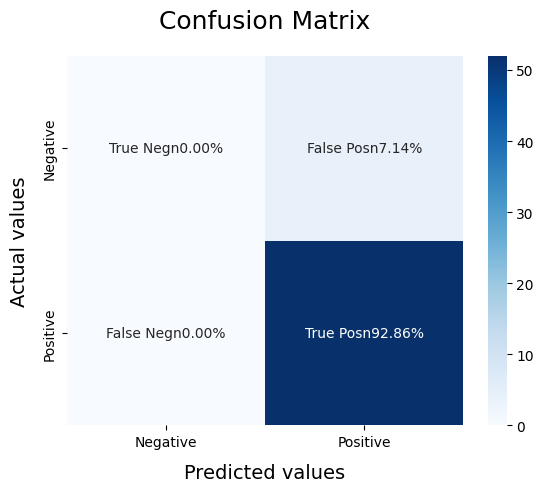

In [6]:
# TRAININIG BERNOULLI AND TESTING IT
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import time
import seaborn as sns

# print(embedding_dict['అతనిపై'])
text_word_list=[]
y=[]
index = 0
for i in lines_with_value:
    # print(i[0][0])
    labell = i[1][0].strip()
    print(labell)
    if(labell == "TRS" or labell == "TDP" or labell == "YCP"):
        index = 1
    else:
        index = 0
    for j in i[0]:
        # print(type(j))
        word_vector = embedding_dict[j]
        list_for_each_word = []
        for dimension_value in word_vector:
            list_for_each_word.append(dimension_value)
        text_word_list.append(list_for_each_word)
        y.append(index)

print(len(text_word_list),len(y))
# text_word_list = sparse.csr_matrix(text_word_list)
# y = sparse.csr_matrix(y)
# print(y.getnnz())
# print(y)
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    # print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

        
X_train, X_test, y_train, y_test = train_test_split(text_word_list, y, test_size=0.05, random_state=26105111)
# print(X_test,y_test)
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
# print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

